In [153]:
#https://larevueia.fr/machine-learning-pour-la-classification-automatique-de-musiques-avec-python/

In [24]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import librosa
from sklearn import preprocessing
from sklearn.svm import SVC
import pickle



In [2]:
zcr = [] #zero crossing rate

mean_spectral_centroids = [] # moyenne du Spectral centroid

rolloff_point = [] #calcul du spectral rolloff point

mfcc = [ [] for _ in range(20) ] #liste qui contiendra les listes de mfcc (mfcc1, mfcc2,...)



In [3]:
def calcul_features_saving_csv(path_files, path_saved_features): #paths have to be string and without 'csv'
    directory = path_files
    zcr = [] #zero crossing rate
    mean_spectral_centroids = [] # moyenne du Spectral centroid
    rolloff_point = [] #calcul du spectral rolloff point
    mfcc = [ [] for _ in range(20) ] #liste qui contiendra les listes de mfcc (mfcc1, mfcc2,...)

    #adding filename in a list    
    filesnames = []

    for filename in os.listdir(directory):
        sound_file = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(sound_file):
            filesnames.append(sound_file)

    # iterate over files in that directory
    for filename in filesnames:
        #loading the audio
        audio = librosa.load(filename)[0]

        # Calcul du ZCR
        zcr0 = librosa.zero_crossings(audio)
        zcr.append(sum(zcr0))

        # Calcul de la moyenne du Spectral centroid
        spectral_centroids = librosa.feature.spectral_centroid(audio)[0]
        mean_spectral_centroids.append(np.mean(spectral_centroids))

        # Calcul du spectral rolloff point

        rolloff = librosa.feature.spectral_rolloff(audio)
        rolloff_point.append(np.mean(rolloff))

        # Calcul des moyennes des MFCC

        mfcc0 = librosa.feature.mfcc(audio) #liste de 20 liste (mfcc1, mfcc2, ...)

        for i in range(len(mfcc0)):
            mfcc[i].append(np.mean(mfcc0[i]))

    #checking if there is no error of list size
    n = len(filesnames)

    assert len(zcr) == n
    assert len(rolloff_point) == n
    assert len(mean_spectral_centroids) == n

    for i in range(len(mfcc)):
        assert len(mfcc[i]) == n

    #preparing dictionnary to create the dataframe
    dico1 = {'Filesnames' : filesnames,
    'zcr': zcr,
    'spectral_c':mean_spectral_centroids,
    'rolloff': rolloff_point
    }
    dico2 = {
        'mfcc' + str(i): mfcc[i-1] for i in range(1,21)
    }

    data_features_dico = dico1 | dico2

    data_features_df = DataFrame(data_features_dico, columns= ['Filesnames', 'zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20'])

    export_csv_features = data_features_df.to_csv (path_saved_features + '.csv' , index = None, header=True, encoding='utf-8')

    #labelisation of the dataset
    labels = []
    for audio in filesnames:
        if audio[len(directory)+1:len(directory)+6] == 'Autre':
            labels.append(-1)
        else:
            labels.append(1)

    #adding the column of the labels in the dataframe
    data_features_df_labels = data_features_df.assign(Labels = labels) 

    #saving csv with labels
    path_csv_saved_labels = path_saved_features + '_labels.csv'
    export_csv_features_labels = data_features_df_labels.to_csv (path_csv_saved_labels, index = None, header=True, encoding='utf-8')  
    
    

            

In [4]:
%%capture

calcul_features_saving_csv('Dataset_final/Dataset/Test', 'features_dataset_test')

In [5]:
%%capture

calcul_features_saving_csv('Dataset_final/Dataset/Validation', 'features_dataset_valid')


In [6]:
%%capture

calcul_features_saving_csv('Dataset_final/Dataset/Training', 'features_dataset_train')

In [16]:
directory = 'Dataset/Test'

In [7]:
X_valid_labels= pd.read_csv('Features/features_dataset_valid_labels.csv')

In [8]:
X_valid_labels

,Filesnames,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Labels
0,Dataset_final/Dataset/Validation\Autre135528-6...,8743,1954.059333,3858.986492,-21.642727,135.808610,-43.094524,11.316405,-17.153734,2.371192,...,0.395339,-6.268300,2.688388,-6.211486,4.565666,-4.887476,3.953548,-3.375121,3.270066,-1
1,Dataset_final/Dataset/Validation\Autre135528-6...,7808,1702.889270,3294.019966,-36.055565,152.098500,-45.504757,14.446933,-16.327753,0.975379,...,-1.433877,-6.805769,2.337900,-5.966326,3.157627,-4.165167,3.634532,-2.319589,2.493556,-1
2,Dataset_final/Dataset/Validation\Autre135528-6...,7081,1545.873129,2966.976664,-41.600513,163.645570,-42.356400,19.108795,-11.703563,1.257879,...,-0.773502,-7.309393,3.617532,-7.154311,3.949638,-4.241490,3.382845,-2.738063,2.376667,-1
3,Dataset_final/Dataset/Validation\Autre171243-9...,8859,1752.472867,3126.919820,-189.714000,119.825920,-55.326840,5.021244,-17.992582,-18.832773,...,-6.842721,-28.360842,-0.519841,-7.703750,-11.396275,-11.501338,0.179874,-15.424678,-2.709641,-1
4,Dataset_final/Dataset/Validation\Autre171243-9...,9015,1729.803937,3009.669662,-226.892230,123.433685,-55.311100,7.889878,-14.180949,-18.592335,...,0.733204,-26.064741,-4.255068,-15.168889,-14.036809,-13.703525,-1.877064,-14.831892,2.414587,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,Dataset_final/Dataset/Validation\Feu4_65_5.wav,15215,4051.539457,8398.509331,-77.854690,41.596703,55.158886,30.265280,11.648693,29.219263,...,8.442637,-7.067865,5.243075,-8.589261,5.124330,-7.729333,5.993276,-7.587524,3.996865,1
1428,Dataset_final/Dataset/Validation\Feu4_65_6.wav,12742,3790.270307,8267.069663,-79.084120,43.425793,55.573270,31.740246,12.879070,30.038408,...,9.611042,-6.599461,6.046331,-7.701636,5.314174,-6.928343,6.364771,-6.826028,4.520959,1
1429,Dataset_final/Dataset/Validation\Feu4_65_7.wav,13846,3885.158689,8330.051171,-76.990060,42.683380,54.912630,31.638744,13.024987,29.928236,...,8.347178,-7.056386,5.904650,-8.142796,5.119280,-7.781681,5.739549,-7.826714,4.087548,1
1430,Dataset_final/Dataset/Validation\Feu4_65_8.wav,13807,3868.309646,8306.526458,-74.162620,43.046050,53.495450,31.642584,12.598216,29.566390,...,7.948853,-7.152982,6.141828,-7.769194,5.509543,-7.960123,5.757324,-7.647759,4.025075,1


Construction de la matrice de corrélation

In [9]:
df = pd.read_csv('Features/features_dataset_train.csv').iloc[:,1:25]

Text(0.5, -0.15, 'Matrice de corrélation')

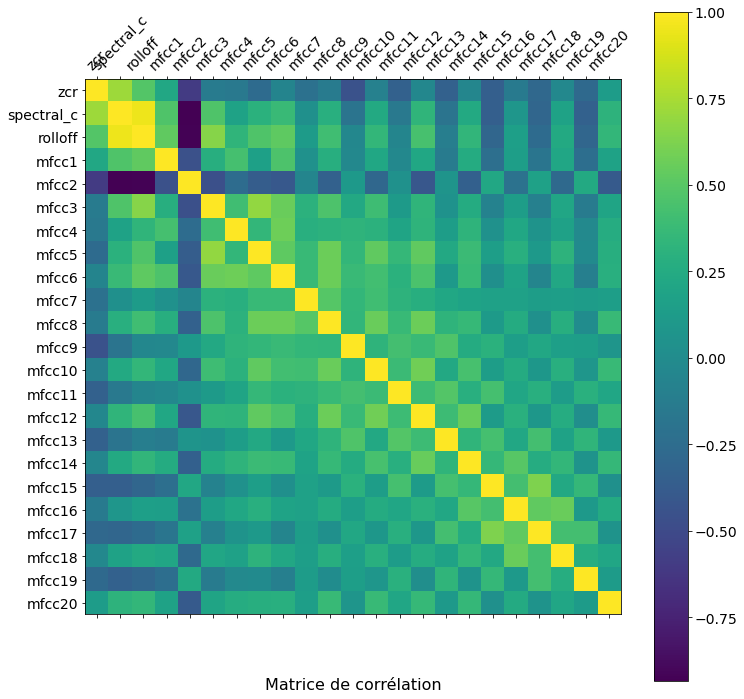

In [11]:
f = plt.figure(figsize=(12, 12))

plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

In [12]:
df.var()

zcr           4.282426e+07
spectral_c    1.009943e+06
rolloff       4.744923e+06
mfcc1         1.082063e+04
mfcc2         2.076277e+03
mfcc3         1.212362e+03
mfcc4         3.531603e+02
mfcc5         2.327527e+02
mfcc6         1.578168e+02
mfcc7         7.551537e+01
mfcc8         8.173334e+01
mfcc9         4.997135e+01
mfcc10        3.466494e+01
mfcc11        3.184143e+01
mfcc12        3.745974e+01
mfcc13        2.919921e+01
mfcc14        2.761190e+01
mfcc15        2.399438e+01
mfcc16        2.557381e+01
mfcc17        2.394043e+01
mfcc18        1.832606e+01
mfcc19        1.394263e+01
mfcc20        1.988396e+01
dtype: float64

Création de SVM utilisant différentes features

In [43]:
def create_SVM_classifier(features, L_result, kernel_ = "linear"):
    X_train_full = pd.read_csv('Features/features_dataset_train.csv').iloc[:,1:25]
    X_train = X_train_full.loc[:, features] 
    Y_train = pd.read_csv('Features/features_dataset_train_labels.csv').iloc[:,24]

    X_test_full = pd.read_csv('Features/features_dataset_test.csv').iloc[:,1:25]
    X_test = X_test_full.loc[:, features] 
    Y_test = pd.read_csv('Features/features_dataset_test_labels.csv').iloc[:,24]
    
    X_val_full = pd.read_csv('Features/features_dataset_valid.csv').iloc[:,1:25]
    X_val = X_val_full.loc[:, features] 
    Y_val = pd.read_csv('Features/features_dataset_valid_labels.csv').iloc[:,24]
    #creation SVM
    classifier = SVC(kernel = kernel_)
    classifier.fit(X_train, Y_train)
    #Prediction sur le Test set
    #y_pred = classifier.predict(X_test)
    perfo_train = classifier.score(X_train, Y_train)
    perfo_test = classifier.score(X_test, Y_test)
    perfo_val = classifier.score(X_val, Y_val)
    
    print('precision sur data train: ', perfo_train)
    print('precision sur data test: ', perfo_test)
    print('precision sur data valid: ', perfo_val)

    L_result.append(perfo_train)
    L_result.append(perfo_test)
    L_result.append(perfo_val)

    print(features)
    return classifier
    

In [59]:
features_1 = ['zcr']
features_2 = ['zcr', 'rolloff', 'mfcc2', 'mfcc12']
features_3 = ['rolloff', 'mfcc2' ]
features_4 = ['zcr', 'spectral_c']
features_5 = ['mfcc'+str(i) for i in range(1,20,3)]
features_6 = ['mfcc2']

In [50]:
result_1 = []
result_2 = []
result_3 = []
result_4 = []
result_5 = []
result_6 = []

In [51]:
SVM_1 = create_SVM_classifier(features_1, result_1,'rbf')

precision sur data train:  0.6622195269860521
precision sur data test:  0.6296875
precision sur data valid:  0.6543296089385475
['zcr']


In [52]:
SVM_2 = create_SVM_classifier(features_2, result_2,'rbf')

precision sur data train:  0.936931473620376
precision sur data test:  0.965625
precision sur data valid:  0.9532122905027933
['zcr', 'rolloff', 'mfcc2', 'mfcc12']


In [53]:
create_SVM_classifier(features_3, result_3, 'rbf')

precision sur data train:  0.8122094198504144
precision sur data test:  0.834375
precision sur data valid:  0.8233240223463687
['rolloff', 'mfcc2']


SVC()

In [54]:
create_SVM_classifier(features_4, result_4, 'rbf')

precision sur data train:  0.939963614311704
precision sur data test:  0.96875
precision sur data valid:  0.9720670391061452
['zcr', 'spectral_c']


SVC()

In [55]:
create_SVM_classifier(features_5, result_5, 'rbf')

precision sur data train:  0.9656357388316151
precision sur data test:  0.9875
precision sur data valid:  0.986731843575419
['mfcc1', 'mfcc4', 'mfcc7', 'mfcc10', 'mfcc13', 'mfcc16', 'mfcc19']


SVC()

In [56]:
create_SVM_classifier(features_6, result_6, 'rbf')

precision sur data train:  0.8853850818677986
precision sur data test:  0.8734375
precision sur data valid:  0.86731843575419
['mfcc2']


SVC()

Construction de la matrice de confusion pour ['zcr', 'rolloff', 'mfcc2', 'mfcc12']

In [19]:
from conf_matrix import show_confusion_matrix
from sklearn.metrics import confusion_matrix



In [20]:
X_test_full = pd.read_csv('Features/features_dataset_test.csv').iloc[:,1:25]
X_test = X_test_full.loc[:, features_2] 
L = SVM_2.predict(X_test)

In [21]:
Y_test = pd.read_csv('Features/features_dataset_test_labels.csv').iloc[:,24]


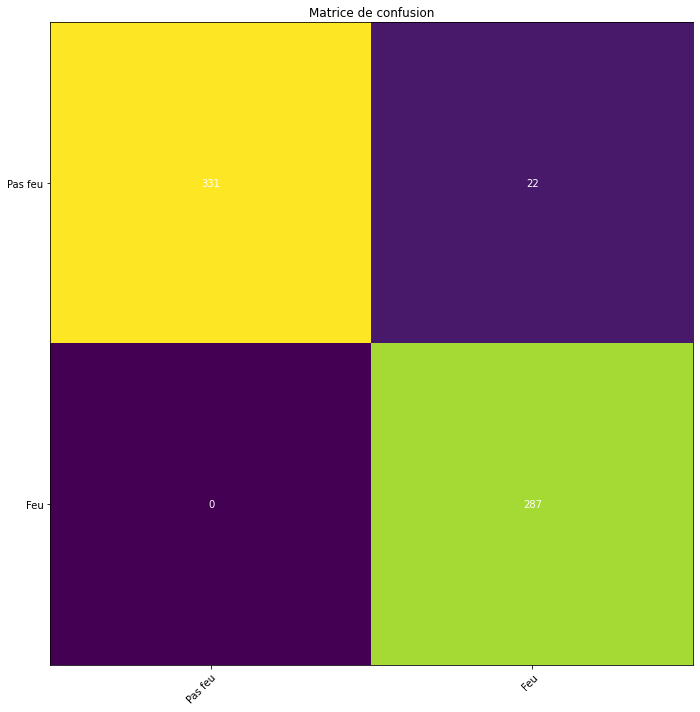

In [22]:
cm = confusion_matrix(Y_test, L)

class_names = ['Pas feu', 'Feu']

show_confusion_matrix(cm, class_names)

Enregistrement du modèle: ['zcr', 'rolloff', 'mfcc2', 'mfcc12']

In [25]:
filename = 'SVM_1.sav'
pickle.dump(SVM_2, open(filename, 'wb'))

Chargement du modèle: ['zcr', 'rolloff', 'mfcc2', 'mfcc12']

In [26]:
loaded_SVM_1 = pickle.load(open(filename, 'rb'))


Tracer diagrammes barres des résultats des SVM

In [57]:
SVMs = [features_1[0],features_2[0],features_3[0],features_4[0],features_5[0],features_6[0]]

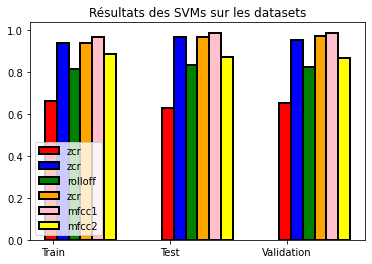

In [64]:
#SVMs = ["Echantillon 1","Echantillon 2","Echantillon 3"] # 3 échantillons

Sous_categories = ['Train', 'Test', 'Validation'] # comparés selon 4 critères

# Valeurs pour chaque catégories

y1 = [1, 2, 5, 2] ; y2 = [1, 6, 4, 2] ; y3 = [1, 6, 4, 2]

from math import * 

nb_categories = len(SVMs)

largeur_barre = floor(1*10/nb_categories)/10

x1 = range(len(result_1))

x2 = [i + largeur_barre for i in x1]

x3 = [i + 2*largeur_barre for i in x1]

x4 = [i + 3*largeur_barre for i in x1]

x5 = [i + 4*largeur_barre for i in x1]

x6 = [i + 5*largeur_barre for i in x1]

import matplotlib.pyplot as plt

plt.bar(x1, result_1, width = largeur_barre, color = 'red',

           edgecolor = 'black', linewidth = 2)

plt.bar(x2, result_2, width = largeur_barre, color = 'blue',

           edgecolor = 'black', linewidth = 2)

plt.bar(x3, result_3, width = largeur_barre, color = 'green',

           edgecolor = 'black', linewidth = 2)

plt.bar(x4, result_4, width = largeur_barre, color = 'orange',

           edgecolor = 'black', linewidth = 2)

plt.bar(x5, result_5, width = largeur_barre, color = 'pink',

           edgecolor = 'black', linewidth = 2)

plt.bar(x6, result_6, width = largeur_barre, color = 'yellow',

           edgecolor = 'black', linewidth = 2)


plt.xticks([r + largeur_barre / nb_categories for r in range(len(result_1))],

              Sous_categories)

plt.legend(SVMs,loc=3)

plt.title("Résultats des SVMs sur les datasets")

plt.show()